# Case Study: Fast Food

This case study explores market segmentation analysis within the fast food industry, specifically focusing on McDonald's brand image. It utilizes a dataset aimed at comparing different survey answer formats related to brand perception. The goal is to identify distinct consumer segments that perceive McDonald's differently, enabling targeted marketing strategies. By understanding these differences, McDonald's can either reinforce positive perceptions in favorable segments or address negative perceptions in less favorable segments by identifying their key drivers and adjusting their messaging accordingly.

## Step 1: Deciding (not) to Segment

McDonald’s has two strategic options: it can either maintain a broad market approach, assuming that understanding differences among consumer segments is unnecessary, or it can recognize the value of these differences and adopt a differentiated marketing strategy to better cater to diverse consumer needs.

## Step 2: Specifying the Ideal Target Segment

McDonald’s management must identify key features that make market segments attractive, focusing on specific criteria. Target segments should be homogeneous, distinct, large enough to warrant a tailored marketing approach, aligned with McDonald’s strengths, identifiable among consumers, and reachable through appropriate communication channels. Attractiveness criteria include having a positive perception of McDonald’s and frequent patronage. Additionally, management may choose to explore segments that currently have negative perceptions to understand and address those views. For this case study, the focus will be on segments that both like McDonald’s and frequently dine there, which will inform target segment selection in the analysis.

## Step 3: Collecting Data

The data set contains responses from 1453 adult Australian consumers relating to their perceptions of McDonald’s with respect to the following attributes: YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING. These attributes emerged from a qualitative study conducted in preparation of the survey study. For each of those attributes, respondents provided either a YES response (indicating that they feel McDonald’s possesses this attribute), or a NO response (indicating that McDonald’s does not possess this attribute).

In addition, respondents indicated their AGE and GENDER. Had this data been collected for a real market segmentation study, additional information – such as details about their dining out behaviour, and their use of information channels – would have been collected to enable the development of a richer and more detailed description of each market segment.

## Step 4: Exploring Data

The initial step involves loading the dataset and examining its key characteristics, including variable names, sample size, and the first three rows. This exploration helps establish an understanding of the dataset's structure and content.

In [1]:
# Loading Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
# Loading Data
df = pd.read_csv("Dataset\McDonalds Case Study\mcdonalds.csv")

In [3]:
# Check all the column names
df.columns.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [4]:
# Check dataset dimensions
df.shape


(1453, 15)

In [5]:
# Check first 3 rows
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


As we can see from the output, the first respondent believes that McDonald’s is not yummy, convenient, not spicy, fattening, not greasy, fast, cheap, not tasty, expensive, not healthy and not disgusting. This same respondent does not like McDonald’s (rating of −3), is 61 years old, eats at McDonald’s every three months and is female. This quick glance at the data shows that the segmentation variables (perception of McDonald’s) are verbal, not numeric. This means that they are coded using the words YES and NO. This is not a suitable format for segment extraction. We need numbers, not words. To get numbers, we store the segmentation variables in a separate matrix, and convert them from verbal YES/NO to numeric binary. First we extract the first eleven columns from the data set because these columns contain the segmentation variables, and convert the data to a matrix. Then we identify all YES entries in the matrix. This results in a logical matrix with entries TRUE and FALSE. Adding 0 to the logical matrix converts TRUE to 1, and FALSE to 0. We check that we transformed the data correctly by inspecting the average value of each transformed segementation variable.

In [6]:
# Extracting the first eleven columns (segmentation variables)
MD_x = df.iloc[:, :11]

# Converting "Yes" to 1 and "No" to 0
MD_x_numeric = (MD_x == "Yes").astype(int)

# Calculating the average for each variable
average_values = MD_x_numeric.mean().round(2)

# Transposing for better viz
average_values.to_frame().T

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0.55,0.91,0.09,0.87,0.53,0.9,0.6,0.64,0.36,0.2,0.24


The average values of the transformed binary numeric segmentation variables indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY, 91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that McDonald’s food is SPICY. 

Another way of exploring data initially is to compute a principal components analysis, and create a perceptual map. A perceptual map offers initial insights into how attributes are rated by respondents and, importantly, which attributes tend to be rated in the same way. Principal components analysis is not computed to reduce the number of variables. This approach – also referred to as factor-cluster analysis – is inferior to clustering raw data in most instances (Dolnicar and Grün 2008). Here, we calculate principal components because we use the resulting components to rotate and project the data for the perceptual map. We use unstandardised data because our segmentation variables are all binary.

In [7]:
# Performing PCA
pca = PCA()
pca.fit(MD_x_numeric)

# Getting the explained variance and other metrics
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Creating a summary DataFrame
summary_df = pd.DataFrame({
    'Standard Deviation': np.sqrt(explained_variance),
    'Proportion of Variance': explained_variance_ratio,
    'Cumulative Proportion': cumulative_variance
})

summary_df

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,0.757050,0.299447,0.299447
1,0.607456,0.192797,0.492244
2,0.504619,0.133045,0.625290
3,0.398799,0.083096,0.708386
4,0.337405,0.059481,0.767866
5,0.310275,0.050300,0.818166
6,0.289697,0.043849,0.862015
7,0.275122,0.039548,0.901563
8,0.265251,0.036761,0.938323
9,0.248842,0.032353,0.970677


In [8]:
# Transposing the DataFrame
summary_df_transposed = summary_df.transpose()

# Renaming columns to PCA1 to PCA11
summary_df_transposed.columns = [f'PCA{i+1}' for i in range(len(summary_df_transposed.columns))]
summary_df_transposed

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
Standard Deviation,0.757050,0.607456,0.504619,0.398799,0.337405,0.310275,0.289697,0.275122,0.265251,0.248842,0.236903
Proportion of Variance,0.299447,0.192797,0.133045,0.083096,0.059481,0.050300,0.043849,0.039548,0.036761,0.032353,0.029323
Cumulative Proportion,0.299447,0.492244,0.625290,0.708386,0.767866,0.818166,0.862015,0.901563,0.938323,0.970677,1.000000


Results from principal components analysis indicate that the first two components capture about 50% of the information contained in the segmentation variables. The following command returns the factor loadings:

In [9]:
# Extracting PCA results
standard_deviation = np.sqrt(explained_variance)
loadings = pca.components_.T

# Creating a summary DataFrame for standard deviations
std_dev_df = pd.DataFrame(standard_deviation, columns=['Standard Deviation'])
std_dev_df.index = [f'PC{i+1}' for i in range(len(std_dev_df))]

# Creating a DataFrame for loadings
loadings_df = pd.DataFrame(loadings, index=MD_x_numeric.columns, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# Displaying standard deviations 
std_dev_df.round(1).transpose()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard Deviation,0.8,0.6,0.5,0.4,0.3,0.3,0.3,0.3,0.3,0.2,0.2


In [10]:
# Displaying and loadings
loadings_df.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,-0.477,0.364,-0.304,0.055,-0.308,0.171,-0.281,0.013,0.572,-0.110,0.045
convenient,-0.155,0.016,-0.063,-0.142,0.278,-0.348,-0.060,-0.113,-0.018,-0.666,-0.542
spicy,-0.006,0.019,-0.037,0.198,0.071,-0.355,0.708,0.376,0.400,-0.076,0.142
fattening,0.116,-0.034,-0.322,-0.354,-0.073,-0.407,-0.386,0.590,-0.161,-0.005,0.251
greasy,0.304,-0.064,-0.802,0.254,0.361,0.209,0.036,-0.138,-0.003,0.009,0.002
fast,-0.108,-0.087,-0.065,-0.097,0.108,-0.595,-0.087,-0.628,0.166,0.240,0.339
cheap,-0.337,-0.611,-0.149,0.119,-0.129,-0.103,-0.040,0.140,0.076,0.428,-0.489
tasty,-0.472,0.307,-0.287,-0.003,-0.211,-0.077,0.360,-0.073,-0.639,0.079,0.020
expensive,0.329,0.601,0.024,0.068,-0.003,-0.261,-0.068,0.030,0.067,0.454,-0.490
healthy,-0.214,0.077,0.192,0.763,0.288,-0.178,-0.350,0.176,-0.186,-0.038,0.158


The loadings indicate how the original variables are combined to form principal components. Loadings guide the interpretation of principal components. In our example, the two segmentation variables with the highest loadings (in absolute terms) for principal component 2 are CHEAP and EXPENSIVE, indicating that this principal component captures the price dimension. We project the data into the principal component space with predict. The following commands rotate and project consumers (in grey) into the first two principal components, plot them and add the rotated and projected original segmentation variables as arrows:

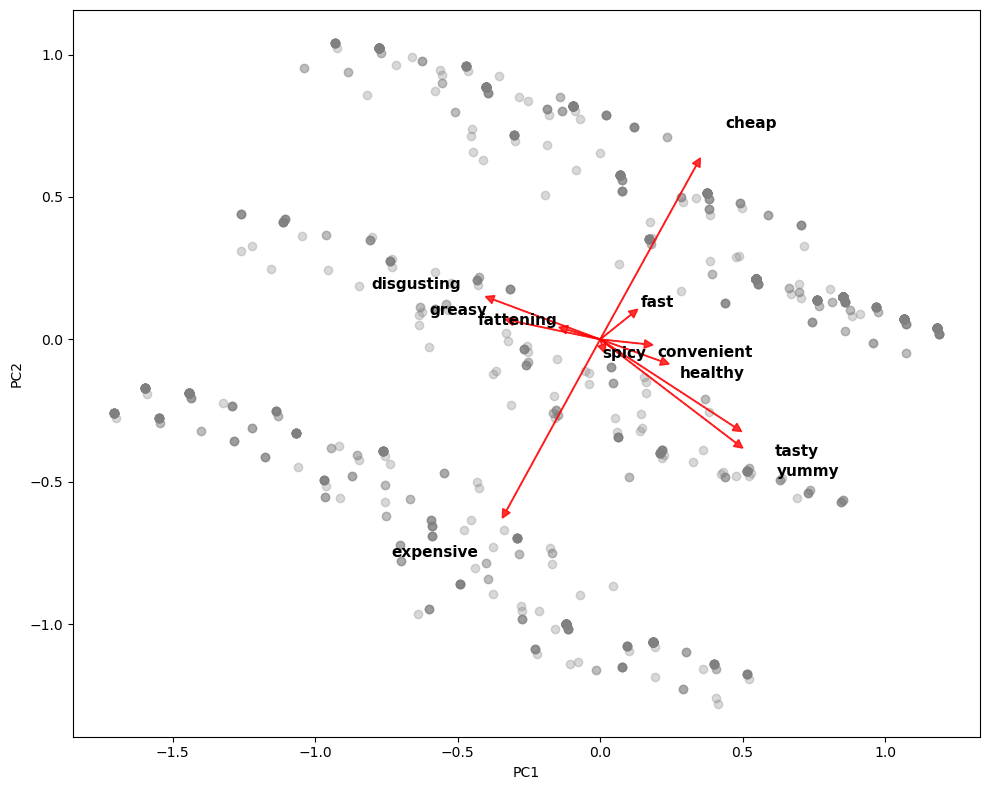

In [11]:
# Perform PCA and plot data points
pca = PCA()
pca_result = pca.fit_transform(MD_x_numeric)
pca.components_[0] *= -1
pca.components_[1] *= -1
pca_result *= -1
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points)
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.3, color='grey')

# Plot feature vectors with adjusted line width and arrow size
for i, feature in enumerate(MD_x_numeric.columns):
    # Scale and plot the arrows with thinner lines and smaller arrowheads
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='r', alpha=0.8, width=0.002, head_width=0.03, head_length=0.03)
    
# Plot the labels on top, ensuring they are not hidden by arrows
for i, feature in enumerate(MD_x_numeric.columns):
    # Calculate label position with the same scaling factor
    label_x = pca.components_[0, i] * 1.3
    label_y = pca.components_[1, i] * 1.2
    
    # Adjust positions based on quadrants for better readability
    ha = 'right' if pca.components_[0, i] < 0 else 'left'
    va = 'top' if pca.components_[1, i] < 0 else 'bottom'
    
    # Plot the labels with black color and a slightly larger font
    plt.text(label_x, label_y, feature, color='black', ha=ha, va=va, fontsize=11, fontweight='bold')

# Add grid, axis lines, and labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()


The attributes CHEAP and EXPENSIVE play a key role in the evaluation of McDonald’s, and these two attributes are assessed quite independently of the others. The remaining attributes align with what can be interpreted as positive versus negative perceptions: FATTENING, DISGUSTING and GREASY point in the same direction in the perceptual chart, indicating that respondents who view McDonald’s as FATTENING, DISGUSTING are also likely to view it as GREASY. In the opposite direction are the positive attributes FAST, CONVENIENT, HEALTHY, as well as TASTY and YUMMY. The observations along the EXPENSIVE versus CHEAP axis cluster around three values: a group of consumers at the top around the arrow pointing to CHEAP, a group of respondents at the bottom around the arrow pointing to EXPENSIVE, and a group of respondents in the middle.

These initial exploratory insights represent valuable information for segment extraction. Results indicate that some attributes are strongly related to one another, and that the price dimension may be critical in differentiating between groups of consumers.

## Step 5: Extracting Segments

Step 5 is where we extract segments. To illustrate a range of extraction techniques, we subdivide this step into three sections. In the first section, we will use standard k-means analysis. In the second section, we will use finite mixtures of binary distributions. In the third section, we will use finite mixtures of regressions.

### Using k-Means

We calculate solutions for two to eight market segments using standard k-means analysis with ten random restarts (argument nrep). We then relabel segment numbers such that they are consistent across segmentations.

In [12]:
# Set random seed for reproducibility
random_state = 1234
np.random.seed(random_state)

# Store the WCSS (inertia) values for each number of clusters
wcss = []

# Perform KMeans
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    kmeans.fit(MD_x_numeric)
    wcss.append(kmeans.inertia_)

We extract between two and eight segments because we do not know in advance what the best number of market segments is. If we calculate a range of solutions, we can compare them and choose the one which extracts segments containing similar consumers which are distinctly different from members of other segments. We compare different solutions using a scree plot:

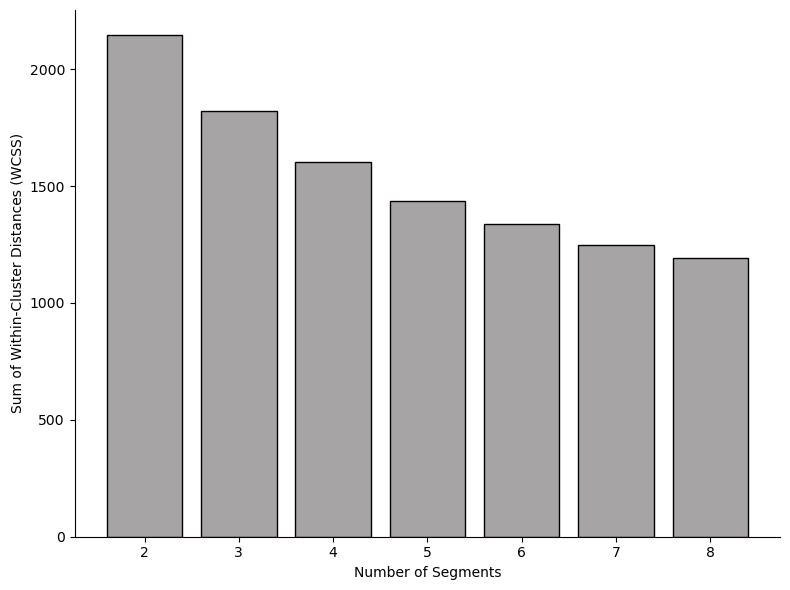

In [13]:
# Plot the WCSS values as a bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(range(2, 9), wcss, color='#a6a4a4', edgecolor='black')

# Customize the plot
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster Distances (WCSS)')
plt.xticks(range(2, 9))

# Remove grid lines and axis lines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

The scree plot has no distinct elbow: the sum of distances within market segments drops slowly as the number of market segments increases. We expect the values to decrease because more market segments automatically mean that the segments are smaller and, as a consequence, that segment members are more similar to one another. But the much anticipated point where the sum of distances drops dramatically is not visible. This scree plot does not provide useful guidance on the number of market segments to extract. 

A second approach to determining a good number of segments is to use stability-based data structure analysis. Stability-based data structure analysis also indicates whether market segments occur naturally in the data, or if they have to be artificially constructed. Stability-based data structure analysis uses stability across replications as criterion to offer this guidance. Imagine using a market segmentation solution which cannot be reproduced. Such a solution would give McDonald’s management little confidence in terms of investing substantial resources into a market segmentation strategy. Assessing the stability of segmentation solutions across repeated calculations (Dolnicar and Leisch 2010) ensures that unstable, random solutions are not used.

Global stability is the extent to which the same segmentation solution emerges if the analysis is repeated many times using bootstrap samples (randomly drawn subsets) of the data. Global stability is calculated using the following R code, which conducts the analysis for each number of segments (between two and eight) using 2 × 100 bootstrap samples (argument nboot) and ten random initialisations (argument nrep) of k-means for each sample and number of segments:

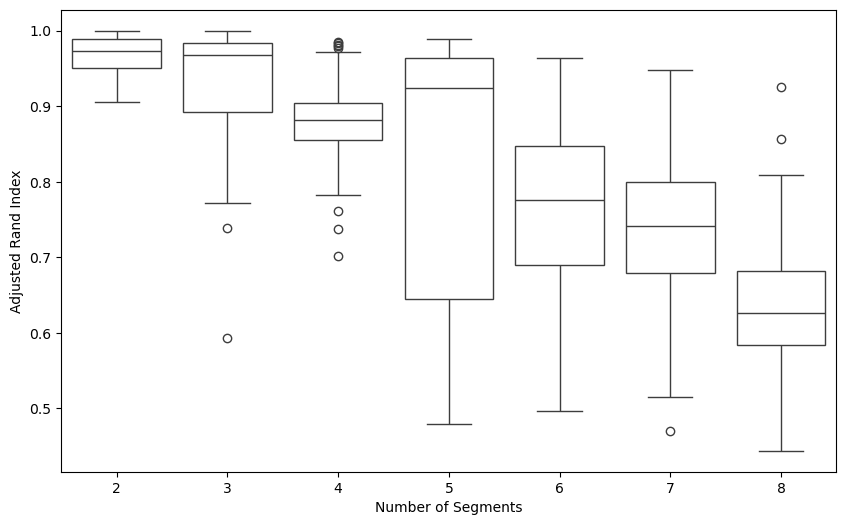

In [14]:
# Function to perform KMeans clustering and return the cluster labels
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    return kmeans.fit_predict(data)

# Store ARI values for each number of clusters
ari_results = {k: [] for k in range(2, 9)}

# Bootstrapping
n_boot = 100
for k in range(2, 9):
    # First, fit the KMeans on the original data to get the true labels
    original_labels = kmeans_clustering(MD_x_numeric, k)
    
    for _ in range(n_boot):
        # Bootstrap sample
        sample_indices = resample(np.arange(MD_x_numeric.shape[0]), replace=True)
        sample = MD_x_numeric.iloc[sample_indices]
        
        # Perform KMeans on the bootstrap sample
        sample_labels = kmeans_clustering(sample, k)
        
        # Compute ARI using the original labels matched to the bootstrap sample
        ari = adjusted_rand_score(sample_labels, original_labels[sample_indices])
        ari_results[k].append(ari)

# Convert results to a DataFrame for plotting
ari_df = pd.DataFrame(ari_results)

# Plot the ARI results as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_df, color='white')  # Use a gray palette
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.xticks(ticks=np.arange(0, 7), labels=range(2, 9))
plt.show()

The vertical boxplots show the distribution of stability for each number of segments. The median is indicated by the fat black horizontal line in the middle of the box. Higher stability is better. Inspecting Fig. A.3 points to the two-, three- and four-segment solutions as being quite stable. However, the two- and three-segment solutions do not offer a very differentiated view of the market. Solutions containing a small number of segments typically lack the market insights managers are interested in. Once we increase the number of segments to five, average stability drops quite dramatically. The foursegment solution thus emerges as the solution containing the most market segments which can still be reasonably well replicated if the calculation is repeated multiple times.

### Using Mixtures of Distributions

We calculate latent class analysis using a finite mixture of binary distributions. The mixture model maximises the likelihood to extract segments (as opposed to minimising squared Euclidean distance, as is the case for k-means). The call to stepFlexmix() extracts two to eight segments (k = 2:8) using ten random restarts of the EM algorithm (nrep), model = FLXMCmvbinary() for a segment-specific model consisting of independent binary distributions and no intermediate output about progress (verbose = FALSE).

In [15]:
results = []

# Fit Gaussian Mixture Model for 2 to 8 components
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=random_state)
    gmm.fit(MD_x_numeric)

    # Store relevant metrics
    log_likelihood = gmm.score(MD_x_numeric) * MD_x_numeric.shape[0]
    aic = gmm.aic(MD_x_numeric)
    bic = gmm.bic(MD_x_numeric)
    
    # Placeholder for convergence and iteration counts
    converged = True
    iteration_count = gmm.n_iter_ if hasattr(gmm, 'n_iter_') else None 
    icl = aic + (2 * np.sum(gmm.weights_ * np.log(gmm.weights_)))

    results.append({
        'iter': iteration_count,
        'converged': converged,
        'k': k,
        'k0': k,
        'logLik': log_likelihood,
        'AIC': aic,
        'BIC': bic,
        'ICL': icl
    })

# Convert results to DataFrame for easier handling
results_df = pd.DataFrame(results)

# Display results
results_df

,iter,converged,k,k0,logLik,AIC,BIC,ICL
0,7,True,2,2,11147.820925,-21985.641850,-21167.027072,-21986.898723
1,12,True,3,3,14126.449712,-27786.899425,-26556.336565,-27788.538217
2,11,True,4,4,17513.541902,-34405.083804,-32762.572863,-34407.646469
3,8,True,5,5,20943.288407,-41108.576813,-39054.117790,-41111.484220
4,8,True,6,6,28522.042011,-56110.084021,-53643.676917,-56113.324965
5,19,True,7,7,25588.131607,-50086.263214,-47207.908028,-50089.808188
6,14,True,8,8,27523.596680,-53801.193359,-50510.890091,-53805.211937


We plot the information criteria with a customised label for the y-axis to choose a suitable number of segments:

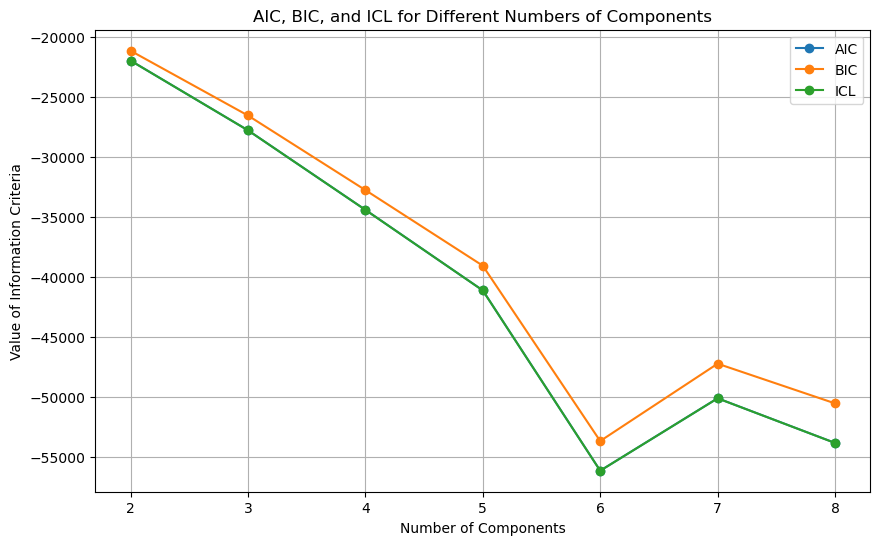

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(2, 9), results_df['AIC'], marker='o', label='AIC')
plt.plot(range(2, 9), results_df['BIC'], marker='o', label='BIC')
plt.plot(range(2, 9), results_df['ICL'], marker='o', label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('AIC, BIC, and ICL for Different Numbers of Components')
plt.legend()
plt.grid()
plt.show()

Figure plots the information criteria values AIC, BIC and ICL on the y-axis for the different number of components (segments) on the x-axis. As can be seen, the values of all information criteria decrease quite dramatically until four components (market segments) are reached. If the information criteria are strictly applied based on statistical inference theory, the ICL recommends – by a small margin – the extraction of seven market segments. The BIC also points to seven market segments. The AIC values continue to decrease beyond seven market segments, indicating that at least eight components are required to suitably fit the data. The visual inspection of Fig. A.7 suggests that four market segments might be a good solution if a more pragmatic point of view is taken; this is the point at which the decrease in the information criteria flattens visibly. We retain the four-component solution and compare it to the four-cluster k-means solution presented in Sect. A.5.1 using a cross-tabulation:

In [17]:
gmm_models = {}

# Fit GMM models for clusters 2 to 8
for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x_numeric)
    gmm_models[k] = gmm

# Retrieve the model for 4 clusters
MD_m4 = gmm_models[4]

# Fit KMeans for 4 clusters
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x_numeric)

# Get GMM cluster labels for the model with 4 components
gmm_labels = MD_m4.predict(MD_x_numeric)

# Create contingency table
contingency_table = pd.crosstab(kmeans_labels, gmm_labels, rownames=['KMeans'], colnames=['GMM'])
print(contingency_table)

GMM       0    1    2    3
KMeans                    
0        31   51  268   14
1         4  214    0   22
2       143    0  362   28
3         0    3    0  313


### Using Mixtures of Regression Models

Instead of finding market segments of consumers with similar perceptions of McDonald’s, it may be interesting to find market segments containing members whose love or hate for McDonald’s is driven by similar perceptions. This segmentation approach would enable McDonald’s to modify critical perceptions selectively for certain target segments in view of improving love and reducing hate. We extract such market segments using finite mixtures of linear regression models, also called latent class regressions. Here, the variables are not all treated in the same way. Rather, one dependent variable needs to be specified which captures the information predicted using the independent variables. We choose as dependent variable y the degree to which consumers love or hate McDonald’s. The dependent variable contains responses to the statement I LIKE MCDONALDS. It is measured on an 11-point scale with endpoints labelled I LOVE IT! and I HATE IT!. The independent variables x are the perceptions of McDonald’s. In this approach the segmentation variables can be regarded as unobserved, and consisting of the regression coefficients. This means market segments consist of consumers for whom changes in perceptions have similar effects on their liking of McDonald’s. First we create a numerical dependent variable by converting the ordinal variable LIKE to a numeric one. We need a numeric variable to fit mixtures of linear regression models. The categorical variable has 11 levels, from I LOVE IT!(+5) with numeric code 1 to I HATE IT!(-5) with numeric code 11. Computing 6 minus the numeric code will result in 6 − 11 = −5 for I HATE IT!-5, 6 − 10 = −4 for "-4", etc.:

In [18]:
df['Like'].unique()

array(['-3', '+2', '+1', '+4', 'I love it!+5', 'I hate it!-5', '-2', '+3',
       '0', '-4', '-1'], dtype=object)

In [19]:
# mapping of 'Like' ordinal categories to numeric values
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

# Apply the mapping to convert 'Like' to a numeric column
df['Like_n'] = df['Like'].map(like_mapping)

df['Like_n'].value_counts().sort_index().to_frame().T

Like_n,-5,-4,-3,-2,-1,0,1,2,3,4,5
count,152,71,73,59,58,169,152,187,229,160,143


Then we can either create a model formula for the regression model manually by typing the eleven variable names, and separating them by plus signs. Or we can automate this process in R by first collapsing the eleven independent variables into a single string separated by plus signs, and then pasting the dependent variable Like.n to it. Finally, we convert the resulting string to a formula.

In [20]:
perception_columns = MD_x.columns
independent_vars = " + ".join(perception_columns)

formula = f"Like_n ~ {independent_vars}"

# Print the formula to verify
print(formula)

# Fit a regression model using the formula in statsmodels
model = smf.ols(formula=formula, data=df).fit()

# Output the summary of the regression model
print(model.summary())

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
                            OLS Regression Results                            
Dep. Variable:                 Like_n   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     216.9
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          4.03e-296
Time:                        20:04:01   Log-Likelihood:                -3003.4
No. Observations:                1453   AIC:                             6031.
Df Residuals:                    1441   BIC:                             6094.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------

We fit a finite mixture of linear regression models with the EM algorithm using nrep = 10 random starts and k=2 components. We ask for the progress of the EM algorithm not to be visible on screen during estimation (verbose = FALSE):

In [21]:
# Replace 'Yes' with 1 and 'No' with 0
df[perception_columns] = df[perception_columns].replace({'Yes': 1, 'No': 0})

# Prepare the df for clustering
X = df[perception_columns]
y = df["Like_n"]

# Standardize the independent variables for better performance of GMM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=2, random_state=1234, n_init=10)
gmm.fit(X_scaled)

# Get the cluster assignments (latent classes)
df['cluster'] = gmm.predict(X_scaled)

# Output the sizes of each cluster
cluster_sizes = np.bincount(df['cluster'])
print(f"Cluster sizes: {cluster_sizes}")

# Fit a Linear Regression Model within each Cluster and provide summary
for cluster in range(2):  # For both clusters
    cluster_data = df[df['cluster'] == cluster]
    X_cluster = cluster_data[perception_columns]
    y_cluster = cluster_data["Like_n"]
    
    # Fit a linear regression for each cluster
    reg = LinearRegression()
    reg.fit(X_cluster, y_cluster)
    
    # Predicted values and performance metrics (optional)
    y_pred = reg.predict(X_cluster)
    mse = mean_squared_error(y_cluster, y_pred)
    
    print(f"\nCluster {cluster} regression summary:")
    print(f"Cluster {cluster} size: {len(cluster_data)}")
    print(f"Regression Coefficients for Cluster {cluster}:")
    for col, coef in zip(perception_columns, reg.coef_):
        print(f"{col}: {coef:.4f}")
    
    print(f"Intercept: {reg.intercept_:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"R-squared: {reg.score(X_cluster, y_cluster):.4f}")

# Output convergence information from GMM
print(f"Convergence: {gmm.converged_}")
print(f"Number of iterations: {gmm.n_iter_}")

Cluster sizes: [ 393 1060]

Cluster 0 regression summary:
Cluster 0 size: 393
Regression Coefficients for Cluster 0:
yummy: 3.2997
convenient: 0.9480
spicy: -0.0740
fattening: 0.0518
greasy: 0.0906
fast: 0.4125
cheap: -0.0054
tasty: 1.3688
expensive: -0.0361
healthy: 0.3812
disgusting: -1.9545
Intercept: -2.6131
Mean Squared Error (MSE): 4.5141
R-squared: 0.5030

Cluster 1 regression summary:
Cluster 1 size: 1060
Regression Coefficients for Cluster 1:
yummy: 2.0706
convenient: 0.0000
spicy: -0.4944
fattening: -0.5010
greasy: -0.3650
fast: 0.2400
cheap: 0.0656
tasty: 1.3624
expensive: 0.0112
healthy: 0.4613
disgusting: 0.0000
Intercept: -0.3373
Mean Squared Error (MSE): 3.2392
R-squared: 0.4137
Convergence: True
Number of iterations: 8


C:\Users\coolc\AppData\Local\Temp\ipykernel_1404\4252443500.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[perception_columns] = df[perception_columns].replace({'Yes': 1, 'No': 0})


## Step 6: Profiling Segments

The core of the segmentation analysis is complete: market segments have been extracted. Now we need to understand what the four-segment k-means solution means. The first step in this direction is to create a segment profile plot. The segment profile plot makes it easy to see key characteristics of each market segment. It also highlights differences between segments. To ensure the plot is easy to interpret, similar attributes should be positioned close to one another. We achieve this by calculating a hierarchical cluster analysis. Hierarchical cluster analysis used on attributes (rather than consumers) identifies – attribute by attribute – the most similar ones.

To understand the market segments, McDonald’s managers need to do two things: (1) compare the bars for each segment with the horizontal lines to see what makes each segment distinct from all consumers in the market; and (2) compare bars across segments to identify differences between segments. Looking at Fig. A.9, we see that segment 1 thinks McDonald’s is cheap and greasy. This is a very distinct perception. Segment 2 views McDonald’s as disgusting and expensive. This is also a very distinct perception, setting apart members of this segment from all other consumers. Members of segment 3 share the view that McDonald’s is expensive, but also think that the food served at McDonald’s is tasty and yummy. Finally, segment 4 is all praise: members of this market segment believe that McDonald’s food is tasty, yummy and cheap and at least to some extent healthy. Another visualisation that can help managers grasp the essence of market segments is the segment separation plot shown in Fig. A.10. The segment separation plot can be customised with additional arguments. We choose not to plot the hulls around the segments (hull = FALSE), to omit the neighbourhood graph (simlines = FALSE), and to label both axes (xlab, ylab):

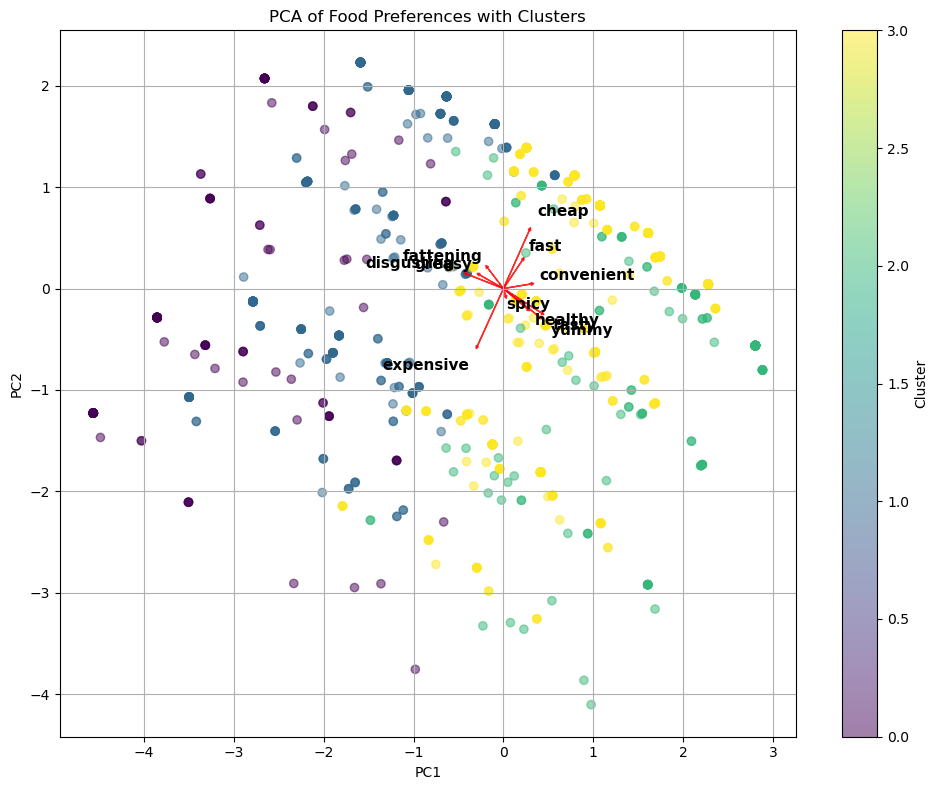

In [22]:
features = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 
            'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
MD_x_numeric = df[features]

# Standardizing the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(MD_x_numeric)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(MD_x_scaled)

# Invert components for visualization consistency
pca.components_[0] *= -1
pca.components_[1] *= -1
pca_result *= -1

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(MD_x_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points) colored by cluster
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis', alpha=0.5)

# Plot feature vectors with adjusted line width and arrow size
for i, feature in enumerate(MD_x_numeric.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
              color='r', alpha=0.8, width=0.002, head_width=0.03, head_length=0.03)

# Plot the labels on top, ensuring they are not hidden by arrows
for i, feature in enumerate(MD_x_numeric.columns):
    label_x = pca.components_[0, i] * 1.3
    label_y = pca.components_[1, i] * 1.2
    ha = 'right' if pca.components_[0, i] < 0 else 'left'
    va = 'top' if pca.components_[1, i] < 0 else 'bottom'
    plt.text(label_x, label_y, feature, color='black', ha=ha, va=va, fontsize=11, fontweight='bold')

# Add color bar, grid, axis lines, and labels
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Food Preferences with Clusters')
plt.grid()
plt.tight_layout()
plt.show()

## Step 7: Describing Segments

The fast food data set is not typical for data collected for market segmentation analysis because it contains very few descriptor variables. Descriptor variables – additional pieces of information about consumers – are critically important to gaining a good understanding of market segments. One descriptor variable available in the fast food data set is the extent to which consumers love or hate McDonald’s. Using a simple mosaic plot, we can visualise the association between segment membership and loving or hating McDonald’s. To do this, we first extract the segment membership for each consumer for the four-segment solution. Next we cross-tabulate segment membership and the lovehate variable. Finally, we generate the mosaic plot with cells colours indicating the deviation of the observed frequencies in each cell from the expected frequency if variables are not associated (shade = TRUE). We do not require a title for our mosaic plot (main = ""), but we would like the x-axis to be labelled (xlab):

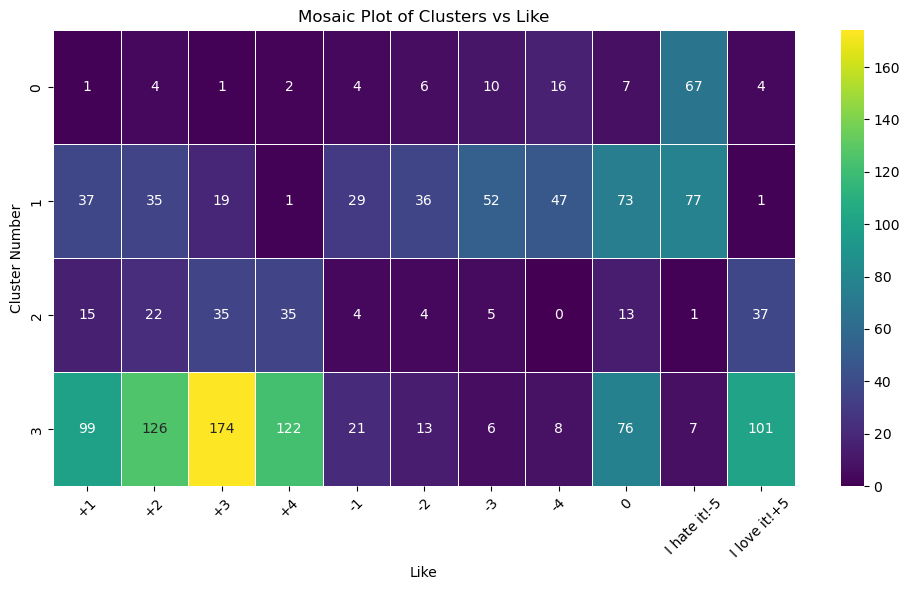

In [23]:
# contingency table
contingency_table = pd.crosstab(df['cluster'], df['Like'])

# Create a mosaic plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Mosaic Plot of Clusters vs Like')
plt.xlabel('Like')
plt.ylabel('Cluster Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The mosaic plot in Figure plots segment number along the x-axis, and loving or hating McDonald’s along the y-axis. The mosaic plot reveals a strong and significant association between those two variables. Members of segment 1 (depicted in the first column) rarely express love for McDonald’s, as indicated by the top left boxes being coloured in red. In stark contrast, members of segment 4 are significantly more likely to love McDonald’s (as indicated by the dark blue boxes in the top right of the mosaic plot). At the same time, these consumers are less likely to hate McDonald’s (as indicated by the very small red boxes at the bottom right of the plot). Members of segment 2 appear to have the strongest negative feelings towards McDonald’s; their likelihood of hating McDonald’s is extremely high (dark blue boxes at the bottom of the second column), and nearly none of the consumers in this segment love McDonald’s (tiny first and second box at the top of column two, then dark red third and fourth box). The fast food data contains a few other basic descriptor variables, such as gender and age. Figure shows gender distribution across segments. We generate this figure using the command:

<Figure size 1000x600 with 0 Axes>

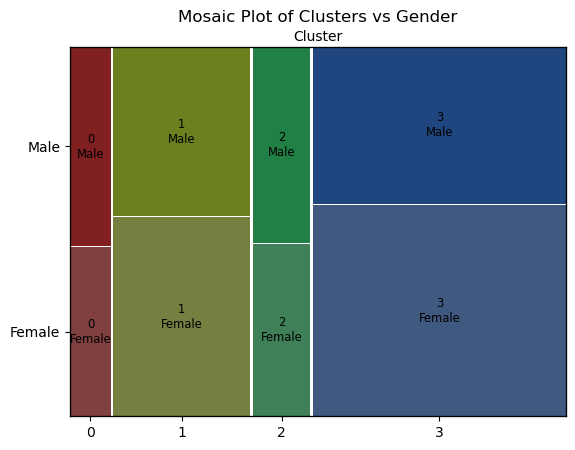

In [24]:
# Create a contingency table for clusters and Gender
contingency_table_gender = pd.crosstab(df['cluster'], df['Gender'])

# Create a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table_gender.stack(), title='Mosaic Plot of Clusters vs Gender',
       axes_label=['Cluster', 'Gender'])
plt.xlabel('Cluster')
plt.ylabel('Gender')
plt.show()

Market segments are plotted along the x-axis. The descriptor variable (gender) is plotted along the y-axis. The mosaic plot offers the following additional insights about our market segments: segment 1 and segment 3 have a similar gender distribution as the overall sample. Segment 2 contains significantly more men (as depicted by the larger blue box for the category male, and the smaller red box for the category female in the second column of the plot). Members of segment 4 are significantly less likely to be men (smaller red box at the top of the fourth column). Because age is metric – rather than categorical – we use a parallel box-andwhisker plot to assess the association of age with segment membership. We generate Fig. A.13 using the R command boxplot(mcdonalds$Age ~ k4, varwidth = TRUE, notch = TRUE). Figure A.13 plots segments along the x-axis, and age along the y-axis. We see immediately that the notches do not overlap, suggesting significant differences in average age across segments. A more detailed inspection reveals that members of segment 3 – consumers who think McDonald’s is yummy and tasty, but expensive – are younger than the members of all other segments. The parallel box-andwhisker plot shows this by (1) the box being in lower position; and (2) the notch in the middle of the box being lower and not overlapping with the notches of the other boxes. To further characterise market segments with respect to the descriptor variables, we try to predict segment membership using descriptor variables. We do this by fitting a conditional inference tree with segment 3 membership as dependent variable, and all available descriptor variables as independent variables:

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df['target'] = (df['cluster'] == 3).astype(int)

# Features to use
features = ['Like_n', 'Age', 'VisitFrequency', 'Gender']
X = df[features]
y = df['target']

X = pd.get_dummies(X, drop_first=True)

# Create and train the Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

DecisionTreeClassifier(random_state=42)

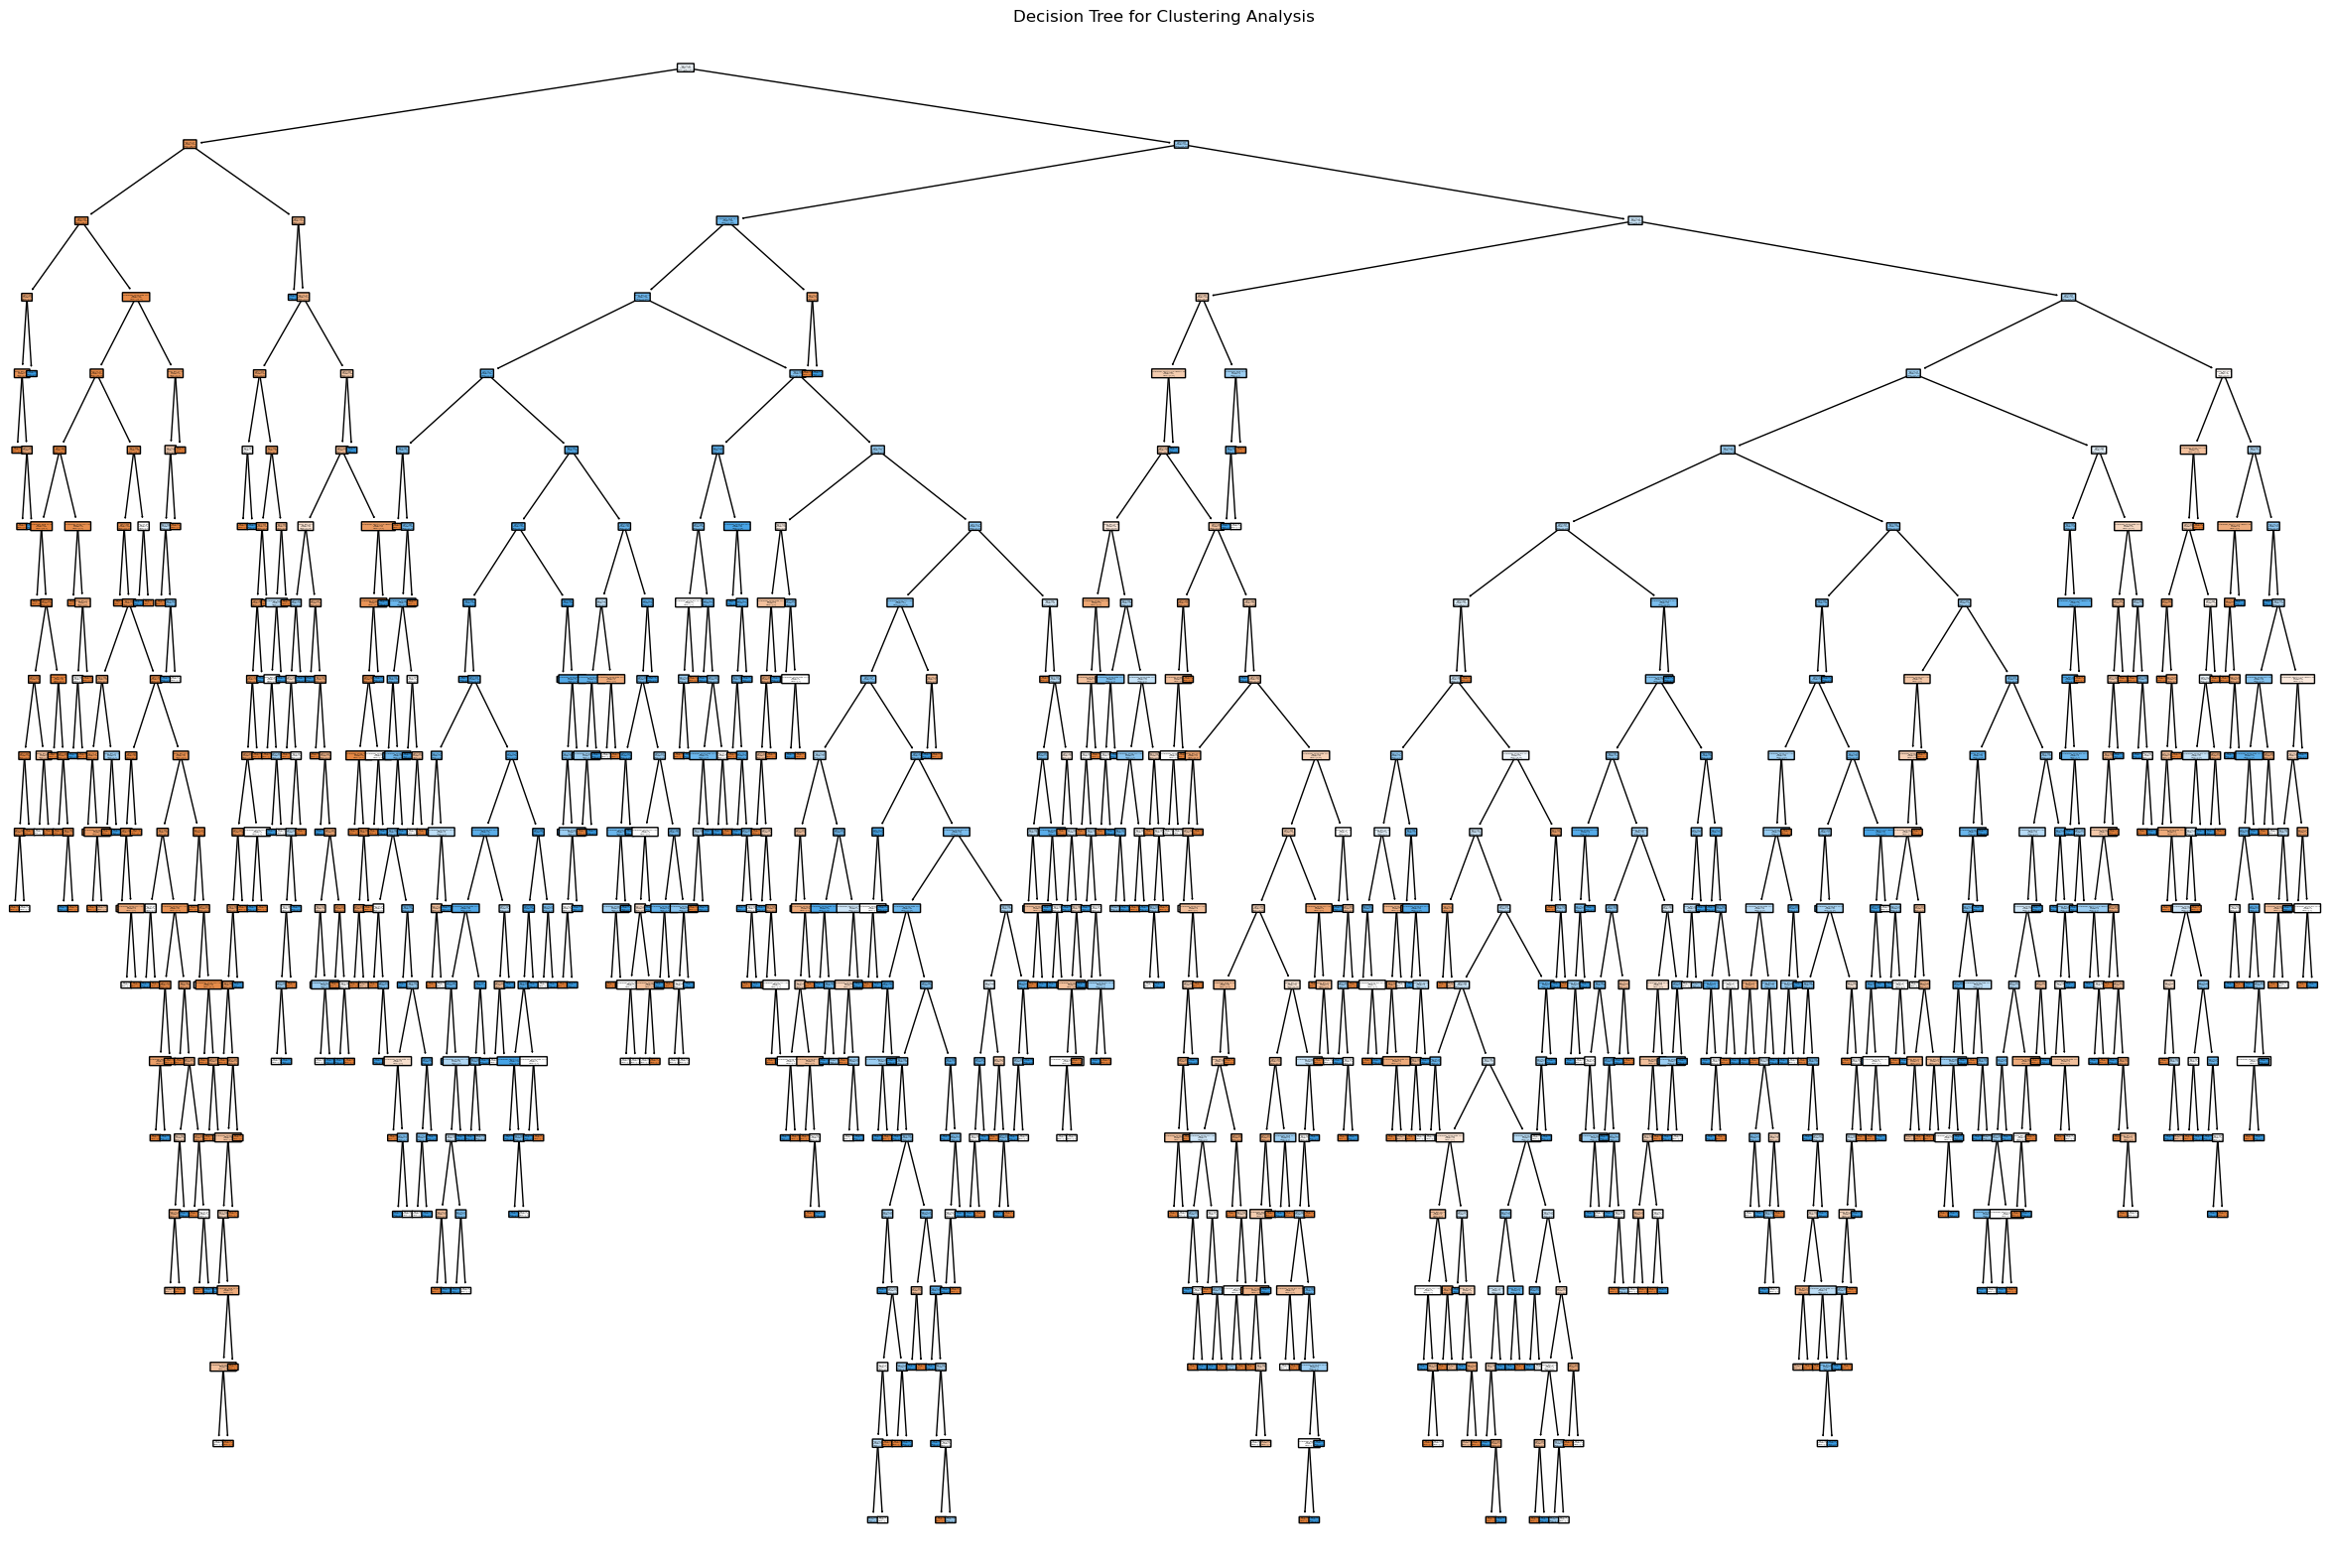

In [26]:
# Plot the decision tree
plt.figure(figsize=(30, 20))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not 3', '3'], rounded=True)
plt.title('Decision Tree for Clustering Analysis')
plt.show()

Figure shows the resulting classification tree. The independent variables used in the tree are LIKE.N, AGE and VISITFREQUENCY. GENDER is not used to split the respondents into groups. The tree indicates that respondents who like McDonald’s, and are young (node 10), or do not like McDonald’s, but visit it more often than once a month (node 8), have the highest probability to belong to segment 3. In contrast, respondents who give a score of −4 or worse for liking McDonald’s, and visit McDonald’s once a month at most (node 5), are almost certainly not members of segment 3. Optimally, additional descriptor variables would be available. Of particular interest would be information about product preferences, frequency of eating at a fast food restaurant, frequency of dining out in general, hobbies and frequently used information sources (such as TV, radio, newspapers, social media). The availability of such information allows the data analyst to develop a detailed description of each market segment. A detailed description, in turn, serves as the basis for tasks conducted in Step 9 where the perfect marketing mix for the selected target segment is designed.

## Step 8: Selecting (the) Target Segment(s)

Using the knock-out criteria and segment attractiveness criteria specified in Step 2, users of the market segmentation (McDonald’s managers) can now proceed to develop a segment evaluation plot. The segment evaluation plot in Fig is extremely simplified because only a small number of descriptor variables are available for the fast food data set. In Fig the frequency of visiting McDonald’s is plotted along the x-axis. The extent of liking or hating McDonald’s is plotted along the y-axis. The bubble size represents the percentage of female consumers. We can obtain the values required to construct the segment evaluation plot using the following commands. First, we compute the mean value of the visiting frequency of McDonald’s for each segment.

In [27]:
df['VisitFrequency'].unique()

array(['Every three months', 'Once a week', 'Once a month', 'Once a year',
       'More than once a week', 'Never'], dtype=object)

In [28]:
# Map VisitFrequency to numeric values
visit_frequency_mapping = {
    'Never': 0,
    'Once a week': 1,
    'More than once a week': 2,
    'Once a month': 3,
    'Every three months': 4,
    'Once a year': 5
}
df['VisitFrequency_numeric'] = df['VisitFrequency'].map(visit_frequency_mapping)

# Calculate the mean VisitFrequency for each cluster
mean_visit = df.groupby('cluster')['VisitFrequency_numeric'].mean()

# Convert to a dictionary to match the R output style
visit = mean_visit.to_dict()
print(visit)

{0: 2.2704918032786887, 1: 3.272727272727273, 2: 2.9415204678362574, 3: 2.8897742363877823}


Function tapply() takes as arguments a variable (here VISITFREQUENCY converted to numeric), a grouping variable (here segment membership k4), and a function to be used as a summary statistic for each group (here mean). A numeric version of liking McDonald’s is already stored in LIKE.N. We can use this variable to compute mean segment values:

In [29]:
# Calculate the mean Like.n for each cluster
mean_like = df.groupby('cluster')['Like_n'].mean()

# Convert to a dictionary to match the R output style
like = mean_like.to_dict()
print(like)

{0: -3.319672131147541, 1: -1.6142506142506143, 2: 2.672514619883041, 3: 2.302788844621514}


We need to convert the variable GENDER to numeric before computing mean segment values:

In [30]:
# Create a binary indicator for Female
df['Female'] = (df['Gender'] == 'Female').astype(int)

# Calculate the mean Female proportion for each cluster
mean_female = df.groupby('cluster')['Female'].mean()

# Convert to a dictionary to match the R output style
female = mean_female.to_dict()
print(female)

{0: 0.45901639344262296, 1: 0.5405405405405406, 2: 0.4678362573099415, 3: 0.5737051792828686}


Now we can create the segment evaluation plot using the following commands:

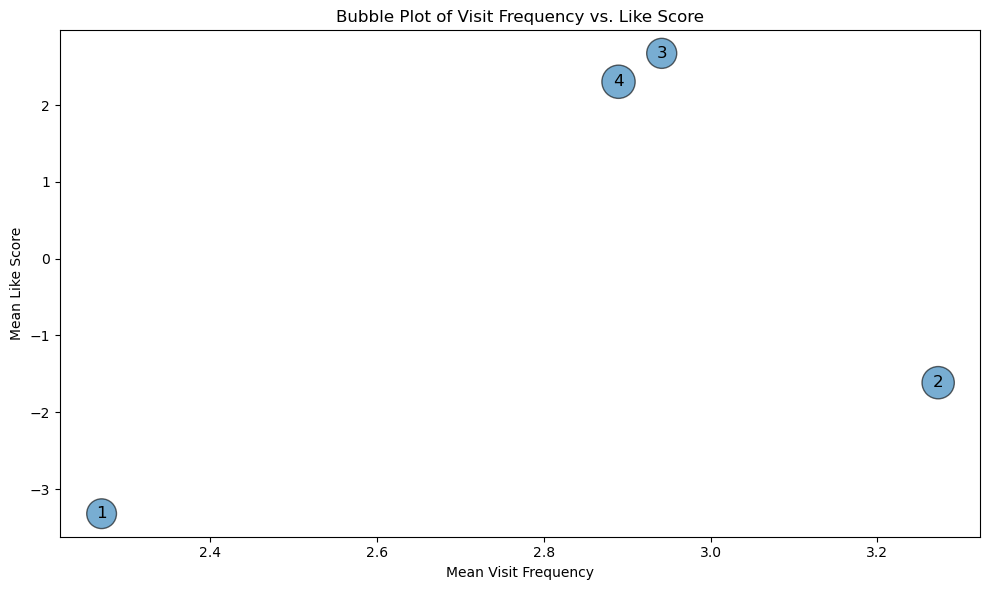

In [31]:
# Convert them to lists for plotting
visit_values = list(visit.values())
like_values = list(like.values())
female_values = list(female.values())

# Create a bubble plot
plt.figure(figsize=(10, 6))
bubble_size = [1000 * f for f in female_values]  # Scale for better visibility

# Scatter plot for bubbles
scatter = plt.scatter(visit_values, like_values, s=bubble_size, alpha=0.6, edgecolors='black')


# Add text labels inside the bubbles
for i, (v, l) in enumerate(zip(visit_values, like_values)):
    plt.text(v, l, str(i + 1), fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.xlabel('Mean Visit Frequency')
plt.ylabel('Mean Like Score')
plt.title('Bubble Plot of Visit Frequency vs. Like Score')

# Show the plot
plt.tight_layout()
plt.show()

Argument cex controls the size of the bubbles. The scaling factor of 10 is a result of manual experimentation. Arguments xlim and ylim specify the ranges for the axes. Figure represents a simplified example of a segment evaluation plot. Market segments 3 and 4 are located in the attractive quadrant of the segment evaluation plot. Members of these two segments like McDonald’s and visit it frequently. These segments need to be retained, and their needs must be satisfied in the future. Market segment 2 is located in the least attractive position. Members of this segment hate McDonald’s, and rarely eat there, making them unattractive as a potential market segment. Market segment 1 does not currently perceive McDonald’s in a positive way, and feels that it is expensive. But in terms of loving McDonald’s and visitation frequency, members of market segment 1 present as a viable target segment. Marketing action could attempt to address the negative perceptions of this segment, and re-inforce positive perceptions. As a result, McDonald’s may be able to broaden its customer base. The segment evaluation plot serves as a useful decision support tool for McDonald’s management to discuss which of the four market segments should be targeted and, as such, become the focus of attention in Step 9.

## Step 9: Customising the Marketing Mix

In Step 9 the marketing mix is designed. If, for example, McDonald’s managers decide to focus on segment 3 (young customers who like McDonald’s, think the food is yummy and tasty, but perceive it as pretty expensive), they could choose to offer a MCSUPERBUDGET line to cater specifically to the price expectations of this segment (4Ps: Price). The advantage of such an approach might be that members of segment 3 develop to become loyal customers who, as they start earning more money, will not care about the price any more and move to the regular McDonald’s range of products. To not cannibalise the main range, the product features of the MCSUPERBUDGET range would have to be distinctly different (4Ps: Product). Next, communication channels would have to be identified which are heavily used by members of segment 3 to communicate the availability of the MCSUPERBUDGET line (4Ps: Promotion). Distribution channels (4Ps: Place) would have to be the same given that all McDonald’s food is sold in McDonald’s outlets. But McDonald’s management could consider having a MCSUPERBUDGET lane where the wait in the queue might be slightly longer in an attempt not to cannibalise the main product line.

## Step 10: Evaluation and Monitoring

After the market segmentation analysis is completed, and all strategic and tactical marketing activities have been undertaken, the success of the market segmentation strategy has to be evaluated, and the market must be carefully monitored on a continuous basis. It is possible, for example, that members of segment 3 start earning more money and the MCSUPERBUDGET line is no longer suitable for them. Changes can occur within existing market segments. But changes can also occur in the larger marketplace, for example, if new competitors enter the market. All potential sources of change have to be monitored in order to detect changes which require McDonald’s management to adjust their strategic or tactical marketing in view of new market circumstances.